In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import seaborn as sns
import plotly.graph_objs as go
import statistics as stats
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model

In [2]:
tit1 = pd.read_csv("../input/titanic/gender_submission.csv")
tit2 = pd.read_csv("../input/titanic/test.csv")
tit3 = pd.read_csv("../input/titanic/train.csv")

I'd like to explore the train data set and see if i can pick out any correlations before I make a start on cleaning. Get a better feel of what lies underneath.

In [3]:
tit3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
tit3.shape

(891, 12)

In [5]:
tit3.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

I'll lok at the survivors and compare them in various charts to see if there are any correlations about who survived etc
* Gender of Survivors
* Passenger Class of Survivors
* Age of Survivors
* Boarding Location
* Parents/Children
* Cost of ticket

Creating some Age bins to categorise the ages a bit better.

In [6]:
agebins = [0,2,4,12,21,30,60,100]
agebinlabels = ["Infant","Toddler","Child","Teeneager","Young Adult","Middle Aged","Elderly"]
tit3["Age_Cat"] = pd.cut(tit3.Age,agebins,labels=agebinlabels)

In [7]:
msv = tit3[(tit3.Sex == "male")& (tit3.Survived == 1)]
fsv = tit3[(tit3.Sex == "female")& (tit3.Survived == 1)]
md = tit3[(tit3.Sex == "male") & (tit3.Survived == 0)]
fd = tit3[(tit3.Sex == "female") & (tit3.Survived == 0)]

In [8]:
msv.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Cat
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,NaN
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,Middle Aged
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,Young Adult
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,NaN
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S,NaN


In [9]:
tit3.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_Cat        177
dtype: int64

In [10]:
msv.Survived.sum()

109

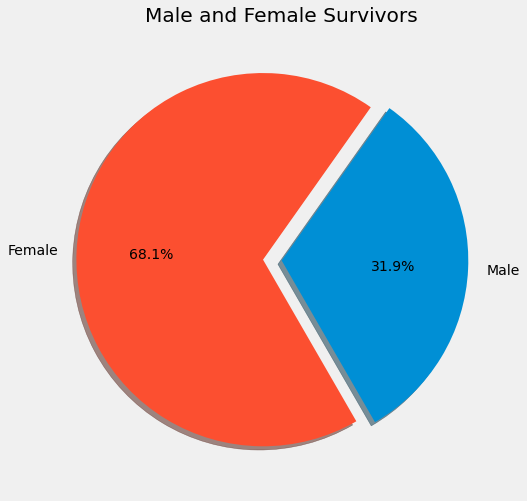

In [11]:
rcParams["figure.figsize"] = 10,8
labels = ("Male","Female")
splits = [msv.Survived.sum(), fsv.Survived.sum()]
explode = (0, 0.1)
plt.style.use("fivethirtyeight")
plt.title("Male and Female Survivors")
plt.pie(splits,  labels=labels,explode=explode, autopct='%1.1f%%', shadow=True, startangle=300);


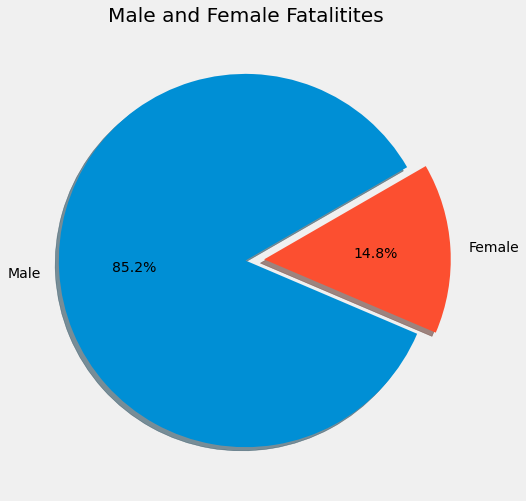

In [12]:
labels = ("Male","Female")
splits = [md.Survived.value_counts().sum(), fd.Survived.value_counts().sum()]
explode = (0, 0.1)
plt.style.use("fivethirtyeight")
plt.title("Male and Female Fatalitites")
plt.pie(splits,  labels=labels,explode=explode, autopct='%1.1f%%', shadow=True, startangle=30);

There is an overwhelmin majority of females that survived. On the other side an even larger population of the male passengers perished. I could drill down a bit more and create some buckets to define the age ranges. I can do two seperate charts for male and female so not clutter up the information too much.

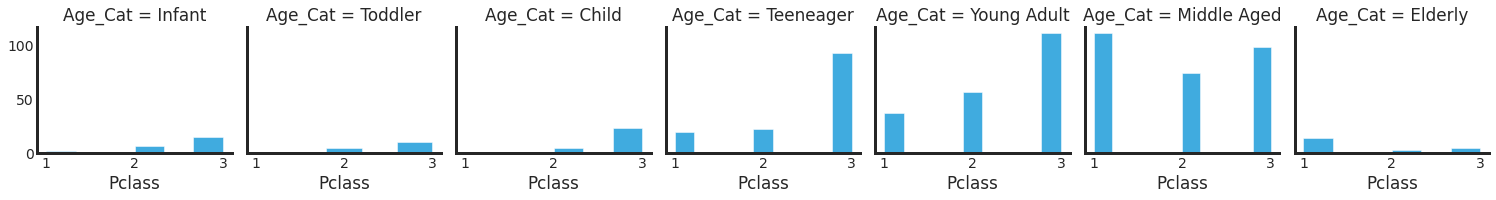

In [13]:
sns.set_style("white")
g = sns.FacetGrid(tit3, col="Age_Cat")
g.map(sns.histplot, "Pclass");

In [14]:
agebinlabels = ["Infant","Toddler","Child","Teeneager","Young Adult","Middle Aged","Elderly"]
infs = tit3[(tit3.Survived == 1) & (tit3.Age_Cat == "Infant")]
todds = tit3[(tit3.Survived == 1) & (tit3.Age_Cat == "Toddler")]
chis = tit3[(tit3.Survived == 1) & (tit3.Age_Cat == "Child")]
teens = tit3[(tit3.Survived == 1) & (tit3.Age_Cat == "Teeneager")]
yas = tit3[(tit3.Survived == 1) & (tit3.Age_Cat == "Young Adult")]
mas = tit3[(tit3.Survived == 1) & (tit3.Age_Cat == "Middle Aged")]
es = tit3[(tit3.Survived == 1) & (tit3.Age_Cat == "Elderly")]
noncat = tit3.Age_Cat.isna().sum()

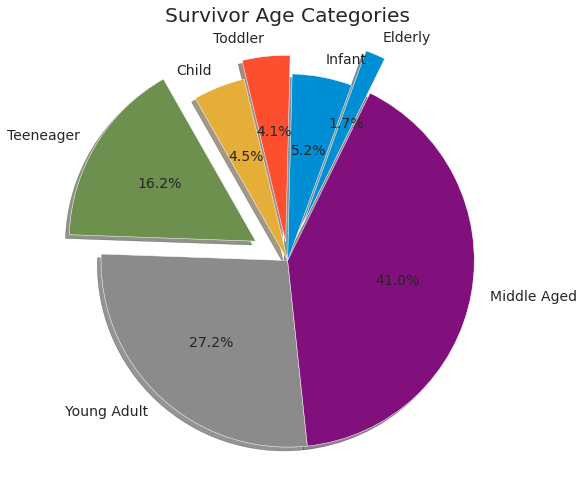

In [15]:
agerangecomp = [infs.Survived.sum(), todds.Survived.sum(),chis.Survived.sum(),teens.Survived.sum(),yas.Survived.sum(),mas.Survived.sum(),es.Survived.sum()]
explode = (0, 0.1,0,0.2,0,0,0.2)
plt.title("Survivor Age Categories")
plt.pie(agerangecomp, labels=agebinlabels, explode = explode, autopct='%1.1f%%', shadow=True, startangle=70);

I could break it down even further and categorise the Age_Cat by Gender and see Which age Range fares better by gender.

In [16]:
#Males
infsm = infs[(tit3.Survived == 1) & (tit3.Sex == "male")]
toddsm = todds[(tit3.Survived == 1) & (tit3.Sex == "male")]
chism = chis[(tit3.Survived == 1) & (tit3.Sex == "male")]
teensm = teens[(tit3.Survived == 1) & (tit3.Sex == "male")]
yasm = yas[(tit3.Survived == 1) & (tit3.Sex == "male")]
masm = mas[(tit3.Survived == 1) & (tit3.Sex == "male")]
esm = es[(tit3.Survived == 1) & (tit3.Sex == "male")]
#Females
infsf = infs[(tit3.Survived == 1) & (tit3.Sex == "female")]
toddsf = todds[(tit3.Survived == 1) & (tit3.Sex == "female")]
chisf = chis[(tit3.Survived == 1) & (tit3.Sex == "female")]
teensf = teens[(tit3.Survived == 1) & (tit3.Sex == "female")]
yasf = yas[(tit3.Survived == 1) & (tit3.Sex == "female")]
masf = mas[(tit3.Survived == 1) & (tit3.Sex == "female")]
esf = es[(tit3.Survived == 1) & (tit3.Sex == "female")];

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/opt/conda/li

''

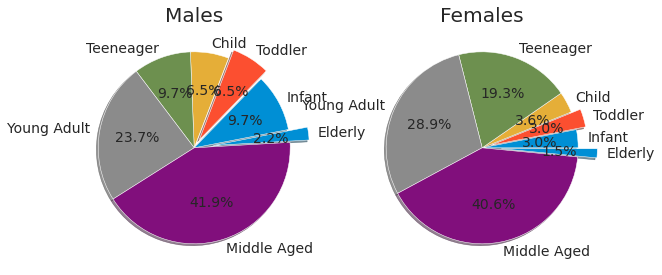

In [17]:
f, axs = plt.subplots(1,1,figsize=(8,8))
plt.tight_layout(pad=0.4, h_pad=0.5, w_pad= 1.0)
explode = (0, 0.1,0,0,0,0,0.2)



plt.subplot(1,2,1)
malesurv = [infsm.Survived.sum(), toddsm.Survived.sum(), chism.Survived.sum() , teensm.Survived.sum() , yasm.Survived.sum() ,masm.Survived.sum() , esm.Survived.sum()]
plt.title("Males")
plt.pie(malesurv,  labels=agebinlabels,explode = explode, autopct='%1.1f%%', shadow=True, startangle=11)

plt.subplot(1,2,2)
femsurv = [infsf.Survived.sum(), toddsf.Survived.sum(), chisf.Survived.sum() , teensf.Survived.sum() , yasf.Survived.sum() ,masf.Survived.sum() , esf.Survived.sum()]
plt.title("Females")
plt.pie(femsurv,  labels=agebinlabels,explode = explode, autopct='%1.1f%%', shadow=True, startangle=0)
;

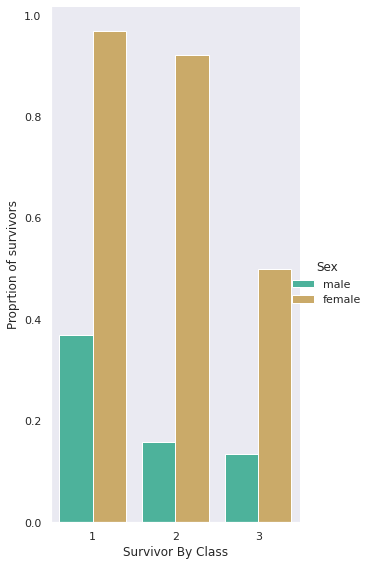

In [18]:
sns.set_theme(style="dark")

SorD = sns.catplot(x="Pclass", y="Survived",hue="Sex",
                data=tit3, saturation=.5,
                kind="bar", ci=None, aspect=.8, palette="turbo", height=6)
SorD.fig.set_figwidth(5)
SorD.fig.set_figheight(8)
#SorD.despine(left=True, bottom=True)
SorD.set_axis_labels("Survivor By Class","Proprtion of survivors")
sns.plotting_context();

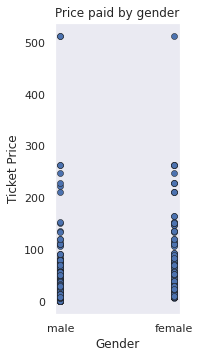

In [19]:
rcParams["figure.figsize"] = 2,5

plt.axvline(0, c=(0.5,0.5,0.5), ls="")
plt.axhline(0, c=(0.5,0.5,0.5), ls="")
plt.title("Price paid by gender")
plt.ylabel("Ticket Price")
plt.xlabel("Gender")
plt.style.use("fivethirtyeight")

plt.scatter(tit3.Sex, tit3.Fare, edgecolor="k")
plt.xticks(rotation= 0);

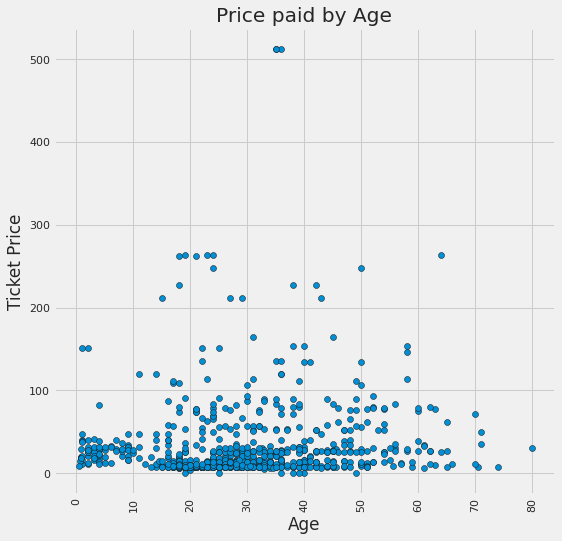

In [20]:
rcParams["figure.figsize"] = 8,8
#plt.xlim(0.5,3.5)
plt.axvline(0, c=(0.5,0.5,0.5), ls="")
plt.axhline(0, c=(0.5,0.5,0.5), ls="")
plt.title("Price paid by Age")
plt.ylabel("Ticket Price")
plt.xlabel("Age")
plt.style.use("fivethirtyeight")

plt.scatter(tit3.Age, tit3.Fare, edgecolor="k")
plt.xticks(rotation= 90);

In [21]:
(tit3.Embarked == "C").sum()

168

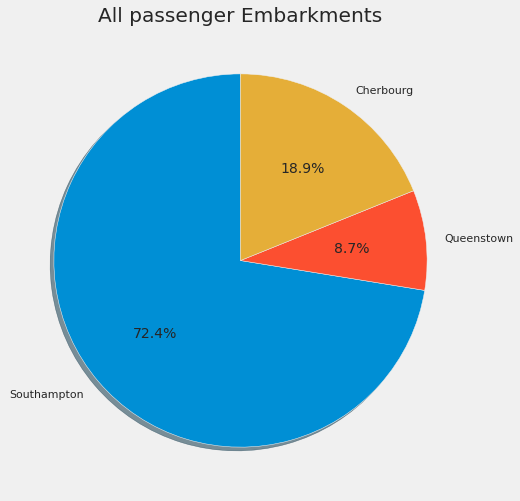

In [22]:
departlabels = ["Southampton", "Queenstown", "Cherbourg"]
departuresurv = [(tit3.Embarked == "S").sum(),(tit3.Embarked == "Q").sum(),(tit3.Embarked == "C").sum()]
plt.title("All passenger Embarkments")
plt.pie(departuresurv,  labels=departlabels, autopct='%1.1f%%', shadow=True, startangle= 90);

''

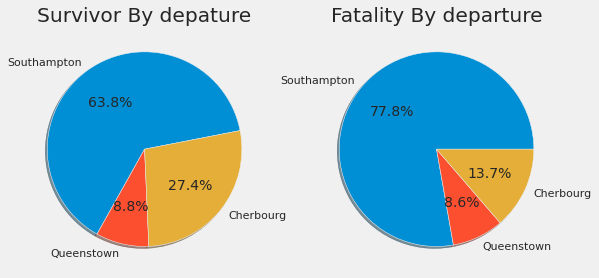

In [23]:
f, axs = plt.subplots(1,1,figsize=(8,8))
plt.tight_layout(pad=0.4, h_pad=0.5, w_pad= 1.0)
explode = (0, 0.1,0,0,0,0,0.2)



plt.subplot(1,2,1)
survdepart = [((tit3.Embarked == "S") & (tit3.Survived == 1)).sum(), ((tit3.Embarked == "Q") & (tit3.Survived == 1)).sum(), ((tit3.Embarked == "C") & (tit3.Survived == 1)).sum()]
plt.title("Survivor By depature")
plt.pie(survdepart,  labels=departlabels, autopct='%1.1f%%', shadow=True, startangle=11)

plt.subplot(1,2,2)
dieddepart = [((tit3.Embarked == "S") & (tit3.Survived == 0)).sum(),((tit3.Embarked == "Q") & (tit3.Survived == 0)).sum(),((tit3.Embarked == "C") & (tit3.Survived == 0)).sum()]
plt.title("Fatality By departure")
plt.pie(dieddepart,  labels=departlabels, autopct='%1.1f%%', shadow=True, startangle=0)
;

# Takeaways From Generated Visualisations

From the graphs and charts I have constructed there are some really clear takeaways:
* 70% of all survivors were Female
* Of the female survivors the top 3 most likely to survive were:
            1 Middle-Aged
            2 Young Adults
            3 Teenagers
* If you had a 1st Class Ticket your chances of survival were significantly higher for both males and females. Substantially higher for females across all Classes.
* One couple in their mid 30's paid 5 x more than any other passenger for some reason. This could be a mistake in the data entry.
* Survivng passngers embarking from Cherbourg vastly outnumbered the fatalities that embarked from Cherbourg.

From the takeaways a Middleaged female from Cherbourg with a 1st Class ticket was the most likely type of passenger to survive.

In [24]:
(tit2.Age.isnull().sum()/tit2.shape[0])*100

20.574162679425836

20-21% of the age data is missing, i think its probably worthwhile to try and find a solution to plug those gaps rather than to just drop all the columns with NaN values.

In [25]:
(tit2.Cabin.isnull().sum()/tit2.shape[0])*100

78.22966507177034

78% of the cabin data is missing. I dont think theres any meaningful way of making this column worth filling up, it's useless so I'll drop it.

In [26]:
tit2 = tit2.drop(columns=["Cabin"])
titheat = tit2
tit2.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,S


I think I'm at a fairly good point to decide what features to use for my models. As I am one at Lvl1 of Machine Learning I'm going to use a descison tree classifier. I'll quickly drop all Na's and make a heat map to see if theres any correlation worth looking into.

In [27]:
titheat.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [28]:
titheat.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [29]:
titheat.dropna(axis=0,inplace=True)

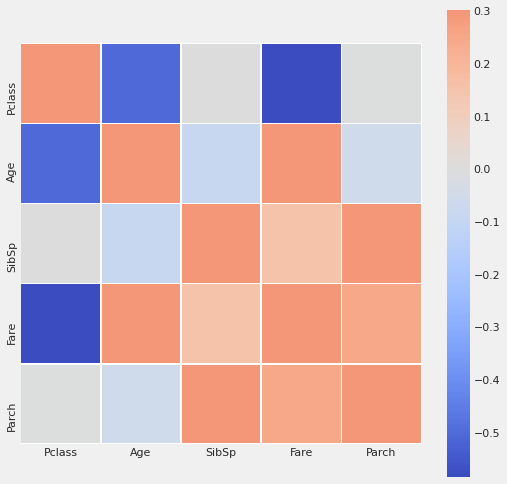

In [30]:
 sns.heatmap(titheat[["Sex", "Pclass", "Age", "SibSp", "Fare", "Embarked","Parch",]].corr(),cmap="coolwarm",vmax=0.3, center=0,square=True,linewidth=0.5);

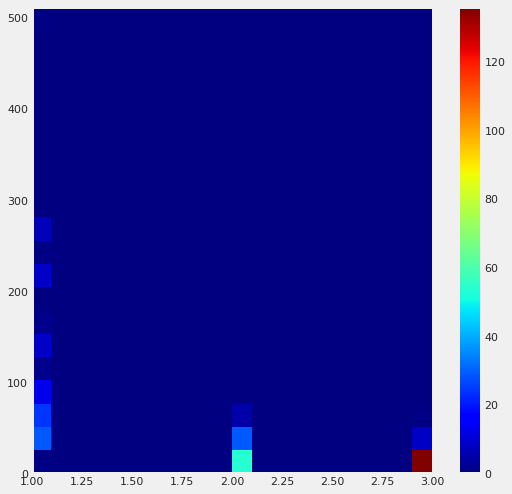

In [53]:
x = titheat.Pclass
y = titheat.Fare

plt.hist2d(x, y, bins=(20, 20), cmap=plt.cm.jet)
plt.colorbar()
plt.show();

In [59]:
titheat = titheat[titheat.Fare < 500]
titheat.Fare.max()

263.0

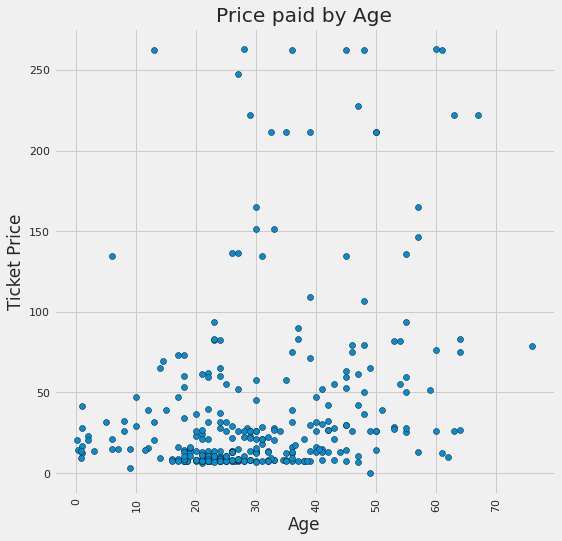

In [63]:
rcParams["figure.figsize"] = 8,8
#plt.xlim(0.5,3.5)
plt.axvline(0, c=(0.5,0.5,0.5), ls="")
plt.axhline(0, c=(0.5,0.5,0.5), ls="")
plt.title("Price paid by Age")
plt.ylabel("Ticket Price")
plt.xlabel("Age")
plt.style.use("fivethirtyeight")

plt.scatter(titheat.Age, titheat.Fare, edgecolor="k")
plt.xticks(rotation= 90);

Since I have removed the outlier for the price paid by the couple in their mid 30's the graph looks much more readable.

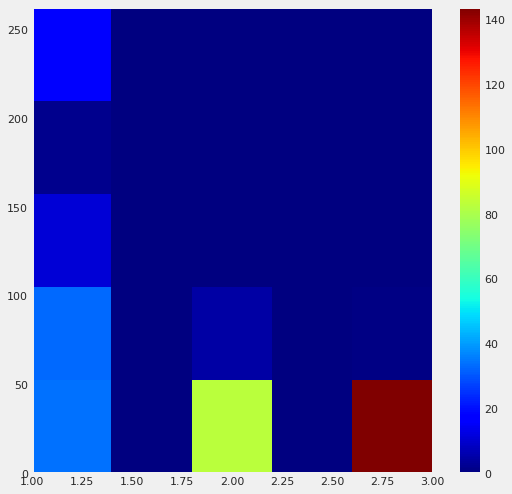

In [61]:
x = titheat.Pclass
y = titheat.Fare

plt.hist2d(x, y, bins=(5, 5), cmap=plt.cm.jet)
plt.colorbar()
plt.show();

After removing the previously noted Outliers in fare the 2D heat matrix becomes a little more readable. The negative correlation stands out much better. 

From the heatmap I can see that there are some really strong correlations for a few of the columns.
* Positive Correlations
    1. Age - Fare
    2. SibSp - Pclass
    3. Parch - Fare
* Negative correlations
    1. Pclass - Fare
    2. Pclass - Age
Sex and Embarked dont seem to be on the matrix though. I should really put them into numerical bins so that they can be calculated too.

In [50]:
titmess = titheat.replace("male",1)
titmess = titmess.replace("female",0)
titmess = titmess.replace({"Q":1,"S":2,"C":3})
titmess

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,2
...,...,...,...,...,...,...,...,...,...,...
409,1301,3,"Peacock, Miss. Treasteall",0,3.0,1,1,SOTON/O.Q. 3101315,13.7750,2
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,37.0,1,0,19928,90.0000,1
412,1304,3,"Henriksson, Miss. Jenny Lovisa",0,28.0,0,0,347086,7.7750,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,3


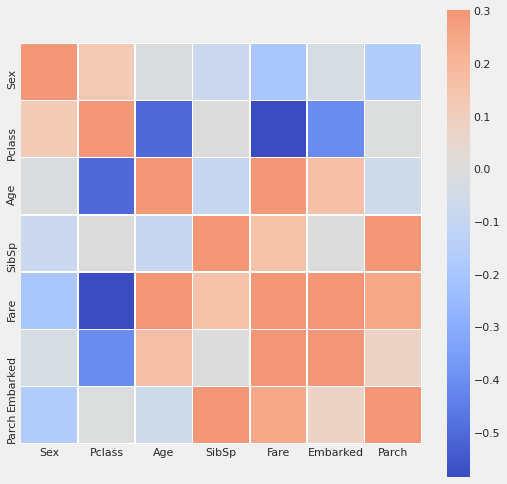

In [52]:
 sns.heatmap(titmess[["Sex", "Pclass", "Age", "SibSp", "Fare", "Embarked","Parch",]].corr(),cmap="coolwarm",vmax=0.3, center=0,square=True,linewidth=0.5);

Aftre reassigning the categorial values in the dataframe to numericals and passing it through into the heat map, i find that there are slightly positive correlations between Sex and Passenger Class and some negative correlations between Sex and Fare. Embarked has a positive correlation between Fare and Age, with negative correlation for Pclass. These will be two extra features I can use in my model.

I'll drop the rest of the useless data like Name and Ticket number as these wouldnt have had any bearing on whether or not they survived.

In [62]:
titmess = titmess.drop(columns=["Name", "Ticket"])
titmess

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
409,1301,3,0,3.0,1,1,13.7750,2
411,1303,1,0,37.0,1,0,90.0000,1
412,1304,3,0,28.0,0,0,7.7750,2
414,1306,1,0,39.0,0,0,108.9000,3
